In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(12,10)})

df = pd.read_csv('cms_data_mftr.csv')

df.head()

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2015,"$134,200.53","718,948","5,802","2,290",$0.19,$23.13,$58.60,0
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,2015,"$197,091.75","986,070","7,889","4,330",$0.20,$24.98,$45.52,0
2,Abacavir,Abacavir Sulfate,AHP,2015,"$14,927.36","2,629",48,21,$5.68,$310.99,$710.83,0
3,Abacavir,Abacavir Sulfate,Apotex Corp,2015,"$3,548,716.76","642,855","10,000","2,184",$5.52,$354.87,"$1,624.87",0
4,Abacavir,Abacavir Sulfate,Aurobindo Pharm,2015,"$6,634,496.81","1,205,223","19,505","3,696",$5.50,$340.14,"$1,795.05",0


In [3]:
df_indication = pd.read_csv('cms_data_drug_use.csv')
df_indication.rename(columns={'Drug Uses**': 'Indication'}, inplace=True)
df_indication.head()

,Brand Name,Generic Name,Indication
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Drug uses not available
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Drug uses not available
2,Abacavir,Abacavir Sulfate,This drug is used with other HIV medications t...
3,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,This product contains 2 drugs: abacavir and la...
4,Abacavir-Lamivudine-Zidovudine,Abacavir/Lamivudine/Zidovudine,"This product contains 3 drugs: abacavir, lamiv..."


In [4]:
df_datadict = pd.read_csv('cms_data_data_dict.csv')
df_datadict.head()

,Variable Name,Description
0,Brand Name,The name of the drug filled. This includes bot...
1,Generic Name,A term referring to the chemical ingredient of...
2,Manufacturer,Name of the manufacturer of the drug.
3,Number of Manufacturers,Number of manufacturers for each drug.
4,Total Spending,Aggregate drug spending for the Medicare Part ...


In [5]:
len(df['Brand Name'].unique())

3398

In [6]:
df_dupi = df[df['Generic Name'].str.match('^[Dd]upilu.*')== True]
df_dupi.head()

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
2951,Dupixent,Dupilumab,Sanofi-Aventis,2015,,,,,,,,
12906,Dupixent,Dupilumab,Sanofi-Aventis,2016,,,,,,,,
22861,Dupixent,Dupilumab,Sanofi-Aventis,2017,"$26,650,729.76","37,059","8,373","1,984",$719.14,"$3,182.94","$13,432.83",0
32816,Dupixent,Dupilumab,Sanofi-Aventis,2018,"$101,803,038.04","$138,330.30","32,049","5,220",$736.25,"$3,176.48","$19,502.50",0
42771,Dupixent,Dupilumab,Sanofi-Aventis,2019,"$265,809,524.59","340,072","81,158","13,171",$790.85,"$3,275.21","$20,181.42",0


In [7]:
df_dupi['Total Spending'] = df_dupi['Total Spending'].str.replace('$', '')
df_dupi['Total Spending'] = df_dupi['Total Spending'].str.replace(',', '')
df_dupi['Total Spending'] = df_dupi['Total Spending'].str[:-3]
df_dupi['Total Spending'][(df_dupi['Year']==2015) | (df_dupi['Year']==2016)] = 0
df_dupi['Total Spending'] = df_dupi['Total Spending'].astype(float)
df_dupi.head()

<ipython-input-7-5af750db7ab4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_dupi['Total Spending'] = df_dupi['Total Spending'].str.replace('$', '')
<ipython-input-7-5af750db7ab4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dupi['Total Spending'] = df_dupi['Total Spending'].str.replace('$', '')
<ipython-input-7-5af750db7ab4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
2951,Dupixent,Dupilumab,Sanofi-Aventis,2015,0.0,,,,,,,
12906,Dupixent,Dupilumab,Sanofi-Aventis,2016,0.0,,,,,,,
22861,Dupixent,Dupilumab,Sanofi-Aventis,2017,26650729.0,"37,059","8,373","1,984",$719.14,"$3,182.94","$13,432.83",0
32816,Dupixent,Dupilumab,Sanofi-Aventis,2018,101803038.0,"$138,330.30","32,049","5,220",$736.25,"$3,176.48","$19,502.50",0
42771,Dupixent,Dupilumab,Sanofi-Aventis,2019,265809524.0,"340,072","81,158","13,171",$790.85,"$3,275.21","$20,181.42",0


<AxesSubplot:xlabel='Year', ylabel='Total Spending'>

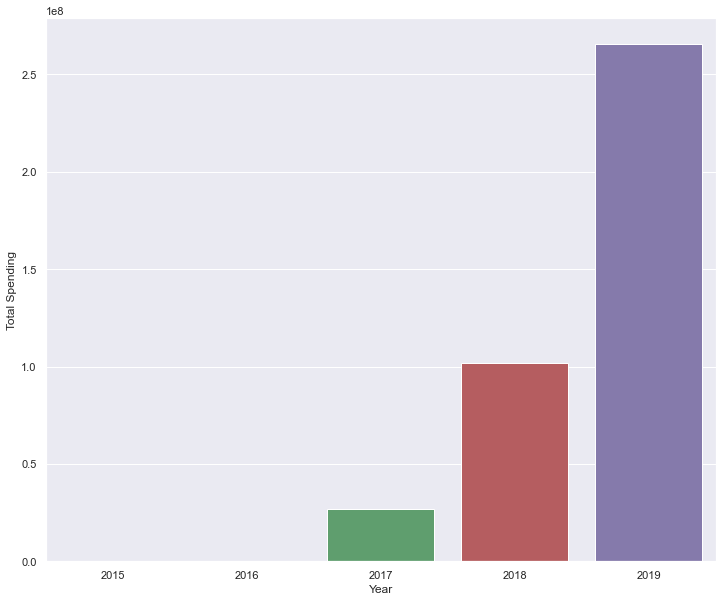

In [8]:
sns.barplot(data=df_dupi, x='Year', y='Total Spending')

In [9]:
df.head()

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2015,"$134,200.53","718,948","5,802","2,290",$0.19,$23.13,$58.60,0
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,2015,"$197,091.75","986,070","7,889","4,330",$0.20,$24.98,$45.52,0
2,Abacavir,Abacavir Sulfate,AHP,2015,"$14,927.36","2,629",48,21,$5.68,$310.99,$710.83,0
3,Abacavir,Abacavir Sulfate,Apotex Corp,2015,"$3,548,716.76","642,855","10,000","2,184",$5.52,$354.87,"$1,624.87",0
4,Abacavir,Abacavir Sulfate,Aurobindo Pharm,2015,"$6,634,496.81","1,205,223","19,505","3,696",$5.50,$340.14,"$1,795.05",0


In [10]:
df2 = df.copy()

In [11]:
df2['Brand Name'] = df2['Brand Name'].str.strip()
df2['Generic Name'] = df2['Generic Name'].str.strip()
df2['Manufacturer'] = df2['Manufacturer'].str.strip()

In [12]:
df2['Total Spending'] = df2['Total Spending'].str.replace('$', '')
df2['Total Spending'] = df2['Total Spending'].str.replace(',', '')
df2['Total Spending'] = df2['Total Spending'].str[:-3]

#df2['Total Spending'] = df2['Total Spending'].astype(float)
df2.head()

<ipython-input-12-0da1457445a4>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Total Spending'] = df2['Total Spending'].str.replace('$', '')


,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2015,134200,"718,948","5,802","2,290",$0.19,$23.13,$58.60,0
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,2015,197091,"986,070","7,889","4,330",$0.20,$24.98,$45.52,0
2,Abacavir,Abacavir Sulfate,AHP,2015,14927,"2,629",48,21,$5.68,$310.99,$710.83,0
3,Abacavir,Abacavir Sulfate,Apotex Corp,2015,3548716,"642,855","10,000","2,184",$5.52,$354.87,"$1,624.87",0
4,Abacavir,Abacavir Sulfate,Aurobindo Pharm,2015,6634496,"1,205,223","19,505","3,696",$5.50,$340.14,"$1,795.05",0


In [13]:
df2 = df2.replace('', 0)
df2 = df2.replace(' ', 0)
df2.dtypes

Brand Name                                     object
Generic Name                                   object
Manufacturer                                   object
Year                                            int64
Total Spending                                 object
Total Dosage Units                             object
Total Claims                                   object
Total \nBeneficiaries                          object
Average Spending Per Dosage Unit (Weighted)    object
Average \nSpending Per Claim                   object
Average \nSpending Per Beneficiary             object
Outlier \nFlag                                 object
dtype: object

In [14]:
df2['Total Dosage Units'] = df2['Total Dosage Units'].str.replace(',','').str.replace('$', '').str.strip().astype(float)

<ipython-input-14-39d3470aaa9e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Total Dosage Units'] = df2['Total Dosage Units'].str.replace(',','').str.replace('$', '').str.strip().astype(float)


In [15]:
df2.dtypes

Brand Name                                      object
Generic Name                                    object
Manufacturer                                    object
Year                                             int64
Total Spending                                  object
Total Dosage Units                             float64
Total Claims                                    object
Total \nBeneficiaries                           object
Average Spending Per Dosage Unit (Weighted)     object
Average \nSpending Per Claim                    object
Average \nSpending Per Beneficiary              object
Outlier \nFlag                                  object
dtype: object

In [16]:
df2['Total Spending'] = df2['Total Spending'].astype(float)

In [17]:
df2.dtypes

Brand Name                                      object
Generic Name                                    object
Manufacturer                                    object
Year                                             int64
Total Spending                                 float64
Total Dosage Units                             float64
Total Claims                                    object
Total \nBeneficiaries                           object
Average Spending Per Dosage Unit (Weighted)     object
Average \nSpending Per Claim                    object
Average \nSpending Per Beneficiary              object
Outlier \nFlag                                  object
dtype: object

In [18]:
df2['Total Claims'] = df2['Total Claims'].str.replace(',','').str.replace('$', '').str.strip().astype(float)

<ipython-input-18-d6720892e1b9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Total Claims'] = df2['Total Claims'].str.replace(',','').str.replace('$', '').str.strip().astype(float)


In [19]:
df2.dtypes

Brand Name                                      object
Generic Name                                    object
Manufacturer                                    object
Year                                             int64
Total Spending                                 float64
Total Dosage Units                             float64
Total Claims                                   float64
Total \nBeneficiaries                           object
Average Spending Per Dosage Unit (Weighted)     object
Average \nSpending Per Claim                    object
Average \nSpending Per Beneficiary              object
Outlier \nFlag                                  object
dtype: object

In [20]:
df2['Total \nBeneficiaries'] = df2['Total \nBeneficiaries'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)

<ipython-input-20-7bb4f78453a1>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Total \nBeneficiaries'] = df2['Total \nBeneficiaries'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)


In [21]:
df2.dtypes

Brand Name                                      object
Generic Name                                    object
Manufacturer                                    object
Year                                             int64
Total Spending                                 float64
Total Dosage Units                             float64
Total Claims                                   float64
Total \nBeneficiaries                          float64
Average Spending Per Dosage Unit (Weighted)     object
Average \nSpending Per Claim                    object
Average \nSpending Per Beneficiary              object
Outlier \nFlag                                  object
dtype: object

In [22]:
df2['Average Spending Per Dosage Unit (Weighted)'] = df2['Average Spending Per Dosage Unit (Weighted)'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)

<ipython-input-22-f77f1fbff878>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Average Spending Per Dosage Unit (Weighted)'] = df2['Average Spending Per Dosage Unit (Weighted)'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)


In [23]:
df2.dtypes

Brand Name                                      object
Generic Name                                    object
Manufacturer                                    object
Year                                             int64
Total Spending                                 float64
Total Dosage Units                             float64
Total Claims                                   float64
Total \nBeneficiaries                          float64
Average Spending Per Dosage Unit (Weighted)    float64
Average \nSpending Per Claim                    object
Average \nSpending Per Beneficiary              object
Outlier \nFlag                                  object
dtype: object

In [24]:
df2['Average \nSpending Per Claim'] = df2['Average \nSpending Per Claim'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)

<ipython-input-24-bb1d888b4e89>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Average \nSpending Per Claim'] = df2['Average \nSpending Per Claim'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)


In [25]:
df2.dtypes

Brand Name                                      object
Generic Name                                    object
Manufacturer                                    object
Year                                             int64
Total Spending                                 float64
Total Dosage Units                             float64
Total Claims                                   float64
Total \nBeneficiaries                          float64
Average Spending Per Dosage Unit (Weighted)    float64
Average \nSpending Per Claim                   float64
Average \nSpending Per Beneficiary              object
Outlier \nFlag                                  object
dtype: object

In [26]:
df2['Average \nSpending Per Beneficiary'] = df2['Average \nSpending Per Beneficiary'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)

<ipython-input-26-9a417aeb6dfe>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df2['Average \nSpending Per Beneficiary'] = df2['Average \nSpending Per Beneficiary'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)


In [27]:
df2.dtypes

Brand Name                                      object
Generic Name                                    object
Manufacturer                                    object
Year                                             int64
Total Spending                                 float64
Total Dosage Units                             float64
Total Claims                                   float64
Total \nBeneficiaries                          float64
Average Spending Per Dosage Unit (Weighted)    float64
Average \nSpending Per Claim                   float64
Average \nSpending Per Beneficiary             float64
Outlier \nFlag                                  object
dtype: object

In [28]:
df2['Outlier \nFlag'].value_counts()

0    36619
0     9565
1     3591
Name: Outlier \nFlag, dtype: int64

In [29]:
df2.head(100)

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2015,1.342000e+05,718948.0,5802.0,2290.0,0.19,23.13,58.60,0
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,2015,1.970910e+05,986070.0,7889.0,4330.0,0.20,24.98,45.52,0
2,Abacavir,Abacavir Sulfate,AHP,2015,1.492700e+04,2629.0,48.0,21.0,5.68,310.99,710.83,0
3,Abacavir,Abacavir Sulfate,Apotex Corp,2015,3.548716e+06,642855.0,10000.0,2184.0,5.52,354.87,1624.87,0
4,Abacavir,Abacavir Sulfate,Aurobindo Pharm,2015,6.634496e+06,1205223.0,19505.0,3696.0,5.50,340.14,1795.05,0
5,Abacavir,Abacavir Sulfate,Camber Pharmace,2015,2.127587e+06,377106.0,6228.0,1823.0,5.64,341.62,1167.08,0
6,Abacavir,Abacavir Sulfate,"Cipla USA, Inc.",2015,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0
7,Abacavir,Abacavir Sulfate,Major Pharmaceu,2015,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0
8,Abacavir,Abacavir Sulfate,Mylan,2015,1.219357e+07,2185794.0,33238.0,6075.0,5.58,366.86,2007.17,0
9,Abacavir,Abacavir Sulfate,Rising Pharm,2015,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0


In [30]:
df2.replace(np.NaN, 0, inplace=True)

In [31]:
df2.head(100)

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2015,1.342000e+05,718948.0,5802.0,2290.0,0.19,23.13,58.60,0
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,2015,1.970910e+05,986070.0,7889.0,4330.0,0.20,24.98,45.52,0
2,Abacavir,Abacavir Sulfate,AHP,2015,1.492700e+04,2629.0,48.0,21.0,5.68,310.99,710.83,0
3,Abacavir,Abacavir Sulfate,Apotex Corp,2015,3.548716e+06,642855.0,10000.0,2184.0,5.52,354.87,1624.87,0
4,Abacavir,Abacavir Sulfate,Aurobindo Pharm,2015,6.634496e+06,1205223.0,19505.0,3696.0,5.50,340.14,1795.05,0
5,Abacavir,Abacavir Sulfate,Camber Pharmace,2015,2.127587e+06,377106.0,6228.0,1823.0,5.64,341.62,1167.08,0
6,Abacavir,Abacavir Sulfate,"Cipla USA, Inc.",2015,0.000000e+00,0.0,0.0,0.0,0.00,0.00,0.00,0
7,Abacavir,Abacavir Sulfate,Major Pharmaceu,2015,0.000000e+00,0.0,0.0,0.0,0.00,0.00,0.00,0
8,Abacavir,Abacavir Sulfate,Mylan,2015,1.219357e+07,2185794.0,33238.0,6075.0,5.58,366.86,2007.17,0
9,Abacavir,Abacavir Sulfate,Rising Pharm,2015,0.000000e+00,0.0,0.0,0.0,0.00,0.00,0.00,0


# df2 is now ready to analyze, with all white space removed from each feature, NaN values replaced with zeroes, all strings converted to floats

<AxesSubplot:xlabel='Year', ylabel='Total Claims'>

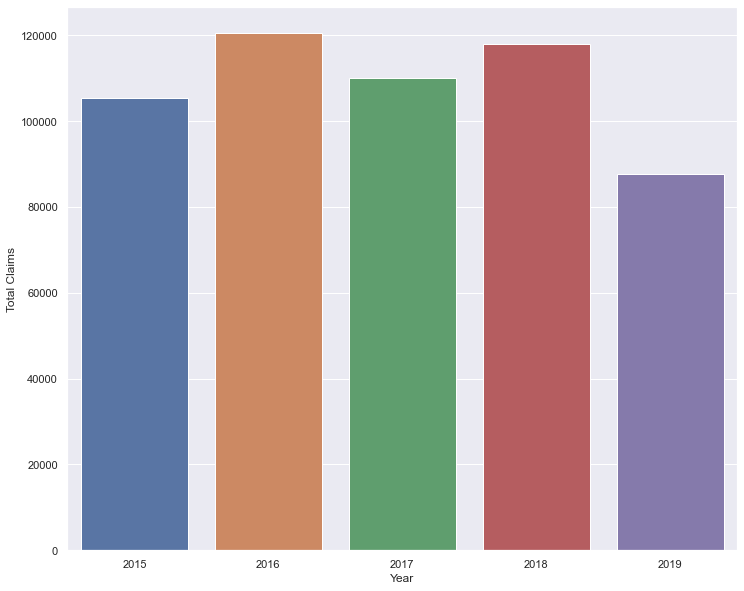

In [32]:
#WANT TO PLOT TOTAL SUM, NOT AVG ACROSS PRODUCTS

sns.barplot(data=df2[df2['Manufacturer'].str.match('[Ss]agent.')==True], x='Year', y='Total Claims', estimator=sum, ci=None)

In [33]:
df_sagent_prac = df2[df2['Manufacturer'].str.match('[Ss]agent.')].groupby(by=['Manufacturer', 'Year'])['Total Spending'].sum().reset_index()
df_sagent_prac.head()

,Manufacturer,Year,Total Spending
0,Sagent Pharmace,2015,9185683.0
1,Sagent Pharmace,2016,8320309.0
2,Sagent Pharmace,2017,6755595.0
3,Sagent Pharmace,2018,11058391.0
4,Sagent Pharmace,2019,16053284.0


# Group by manufacturer, plot sum of total spending across all products

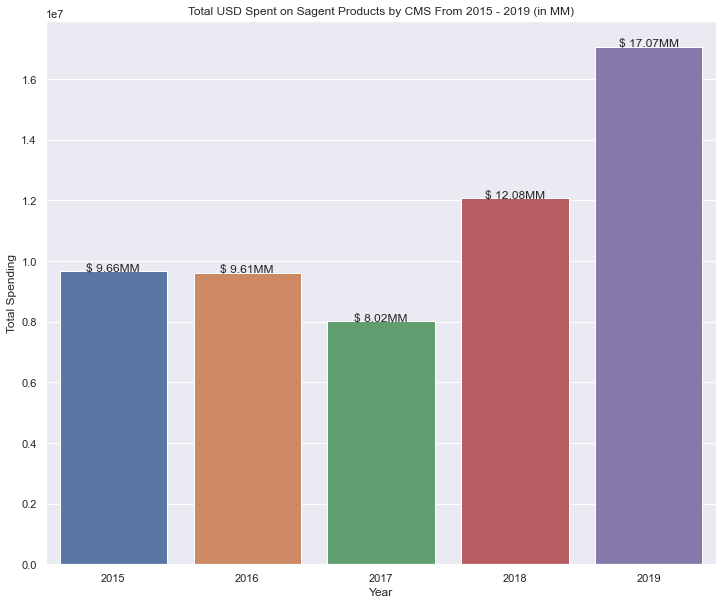

In [34]:
# set confidence intervals (ci) to None, estimator = sum)
barsito = sns.barplot(data = df_sagent_prac, x='Year', y='Total Spending', ci=None, estimator=sum)
barsito.set(title='Total USD Spent on Sagent Products by CMS From 2015 - 2019 (in MM)')
for p in barsito.patches:
 # get the height of each bar
    height = p.get_height()
 # adding text to each bar
    barsito.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+110, # y-coordinate position of data label, padded 100 above bar
    s = '$ {}MM'.format(round(height/1000000, 2)), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center

In [35]:
df_sagent = df2[df2['Manufacturer'].str.match('[Ss]agent.')==True]
df_sagent[df_sagent['Year'] == 2015]

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
97,Acetylcysteine*,Acetylcysteine,Sagent Pharmace,2015,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0
412,Amikacin Sulfate,Amikacin Sulfate,Sagent Pharmace,2015,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0
546,Ampicillin Sodium*,Ampicillin Sodium,Sagent Pharmace,2015,136675.0,85020.0,1009.0,302.0,6.80,135.46,452.57,1
559,Ampicillin-Sulbactam*,Ampicillin Sodium/Sulbactam Na,Sagent Pharmace,2015,96175.0,160181.0,1077.0,399.0,3.67,89.30,241.04,0
852,Azithromycin*,Azithromycin,Sagent Pharmace,2015,9680.0,50993.0,292.0,181.0,0.19,33.15,53.48,0
1414,Carboplatin,Carboplatin,Sagent Pharmace,2015,43943.0,31225.0,615.0,208.0,1.41,71.45,211.27,0
1496,Cefazolin Sodium*,Cefazolin Sodium,Sagent Pharmace,2015,202894.0,414295.0,3281.0,1142.0,0.51,61.84,177.67,1
1497,Cefazolin Sodium*,Cefazolin Sodium,Sagent/Premierp,2015,11119.0,6578.0,272.0,94.0,1.64,40.88,118.29,1
1520,Cefepime HCl,Cefepime HCl,Sagent Pharmace,2015,1527604.0,1227816.0,16198.0,6947.0,1.23,94.31,219.89,1
1521,Cefepime HCl,Cefepime HCl,Sagent/Premierp,2015,306343.0,383337.0,2528.0,1105.0,0.81,121.18,277.23,1


In [36]:
df_sagent_grouped = df_sagent.groupby('Generic Name')
df_sagent_grouped.head(500)

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
97,Acetylcysteine*,Acetylcysteine,Sagent Pharmace,2015,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0
412,Amikacin Sulfate,Amikacin Sulfate,Sagent Pharmace,2015,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0
546,Ampicillin Sodium*,Ampicillin Sodium,Sagent Pharmace,2015,136675.0,85020.00,1009.0,302.0,6.80,135.46,452.57,1
559,Ampicillin-Sulbactam*,Ampicillin Sodium/Sulbactam Na,Sagent Pharmace,2015,96175.0,160181.00,1077.0,399.0,3.67,89.30,241.04,0
852,Azithromycin*,Azithromycin,Sagent Pharmace,2015,9680.0,50993.00,292.0,181.0,0.19,33.15,53.48,0
1414,Carboplatin,Carboplatin,Sagent Pharmace,2015,43943.0,31225.00,615.0,208.0,1.41,71.45,211.27,0
1496,Cefazolin Sodium*,Cefazolin Sodium,Sagent Pharmace,2015,202894.0,414295.00,3281.0,1142.0,0.51,61.84,177.67,1
1497,Cefazolin Sodium*,Cefazolin Sodium,Sagent/Premierp,2015,11119.0,6578.00,272.0,94.0,1.64,40.88,118.29,1
1520,Cefepime HCl,Cefepime HCl,Sagent Pharmace,2015,1527604.0,1227816.00,16198.0,6947.0,1.23,94.31,219.89,1
1521,Cefepime HCl,Cefepime HCl,Sagent/Premierp,2015,306343.0,383337.00,2528.0,1105.0,0.81,121.18,277.23,1


In [37]:
df2.head(10)

,Brand Name,Generic Name,Manufacturer,Year,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,2015,134200.0,718948.0,5802.0,2290.0,0.19,23.13,58.60,0
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,2015,197091.0,986070.0,7889.0,4330.0,0.20,24.98,45.52,0
2,Abacavir,Abacavir Sulfate,AHP,2015,14927.0,2629.0,48.0,21.0,5.68,310.99,710.83,0
3,Abacavir,Abacavir Sulfate,Apotex Corp,2015,3548716.0,642855.0,10000.0,2184.0,5.52,354.87,1624.87,0
4,Abacavir,Abacavir Sulfate,Aurobindo Pharm,2015,6634496.0,1205223.0,19505.0,3696.0,5.50,340.14,1795.05,0
5,Abacavir,Abacavir Sulfate,Camber Pharmace,2015,2127587.0,377106.0,6228.0,1823.0,5.64,341.62,1167.08,0
6,Abacavir,Abacavir Sulfate,"Cipla USA, Inc.",2015,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0
7,Abacavir,Abacavir Sulfate,Major Pharmaceu,2015,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0
8,Abacavir,Abacavir Sulfate,Mylan,2015,12193567.0,2185794.0,33238.0,6075.0,5.58,366.86,2007.17,0
9,Abacavir,Abacavir Sulfate,Rising Pharm,2015,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0


# Practice with Groupby, aggregates

In [38]:
result = df2.groupby('Generic Name')
#for name, group in result:
    #print('Name: ', name, '\nGroup: \n', group[['Brand Name', 'Generic Name', 'Manufacturer', 'Year', 'Total Spending']])
#print('Type: ', type(result))

In [39]:
result['Total Spending'].sum()

Generic Name
0.9 % Sodium Chloride             2.491326e+07
Aa 3.31 %/D9.8w/FAt/E-Lytes 10    6.561900e+04
Aa 4.25 %/Calcium/Lytes/D5W       1.961700e+04
Aa 4.25%/Calcium/Lytes/Dex 10%    5.606200e+04
Aa 5 %/Calcium/Lytes/Dext 20 %    1.827330e+05
Aa 5%/D15w/Electrolytes           5.055470e+05
Abacavir Sulfate                  8.998015e+07
Abacavir Sulfate/Lamivudine       5.150016e+08
Abacavir/Dolutegravir/Lamivudi    2.837316e+09
Abacavir/Lamivudine/Zidovudine    5.866597e+07
Abaloparatide                     1.668242e+08
Abatacept                         1.167187e+09
Abatacept/Maltose                 1.175024e+08
Abemaciclib                       3.291988e+08
Abiraterone Acet,Submicronized    1.311863e+07
Abiraterone Acetate               5.324489e+09
Abobotulinumtoxina                3.236921e+06
Acalabrutinib                     1.381174e+08
Acamprosate Calcium               2.548438e+07
Acarbose                          4.495638e+07
Acebutolol HCl                    1.796275e+07


In [76]:
#useful to know - group by heirarchical groupings, then perform aggregate calculation of choice on the column of choice

result2 = df2.groupby(['Manufacturer', 'Generic Name', 'Year']).agg({'Total Spending': ['sum']}).reset_index()
result2 = pd.DataFrame(result2)
result2.head()

,Manufacturer,Generic Name,Year,Total Spending
,,,,sum
0,3M Espe Dental,Fluoride (Sodium),2015,15823.0
1,3M Espe Dental,Fluoride (Sodium),2016,21963.0
2,3M Espe Dental,Fluoride (Sodium),2017,30826.0
3,3M Espe Dental,Fluoride (Sodium),2018,43742.0
4,3M Espe Dental,Fluoride (Sodium),2019,59081.0


In [ ]:
result3=df2.groupby('Manufacturer')
result3.head()

In [ ]:
#result_abbvie_pre = df2[['Manufacturer', 'Generic Name', 'Year', 'Total Spending']]
#result_abbvie_index = result_abbvie_pre['Manufacturer'].str.extract(r'([Aa]bb[Vv]ie.*)')
#result_abbvie_index.dropna()

In [ ]:
df2.head()

In [ ]:
#want to figure out how to use regex to get subgroup of a dataframe
#result2 = df2[df2['Manufacturer' == 'AbbVie']].groupby(['Manufacturer', 'Generic Name', 'Year']).agg({'Total Spending': ['sum']})

In [ ]:
#count how many times 'Sagent x...' or 'sagent x...' appears in the 'Manufacturer' column
df2['Manufacturer'].str.count(r'(^[Ss]agent)').sum()

In [ ]:
#Sub dataframe with only manufacturers matching 'AbbVie' or variant indicated below.

df_prac = df2[df2['Manufacturer'].str.count(r'(^[Aa]bb[Vv]ie.+)') == 1]
df_prac_2 = df_prac.groupby('Generic Name').agg({'Total Spending': ['sum']})
df_prac_2.plot(kind='bar')

In [ ]:
# charting total sales for all AbbVie products in specified year (2017) - PRACTICE MAKING FACET GRID 
  # to show all in a clean format
fabs = df_prac[df_prac['Year'] == 2017]
bar1 = sns.barplot(data = fabs, x='Generic Name', y='Total Spending', estimator=sum, ci=None)
for item in bar1.get_xticklabels():
    item.set_rotation(90)

for p in bar1.patches:
 # get the height of each bar
    height = p.get_height()
 # adding text to each bar
    bar1.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+100, # y-coordinate position of data label, padded 100 above bar
    s = '{:.0}'.format(height), # data label, formatted to ignore decimals
    ha = 'center') # sets horizontal alignment (ha) to center

In [ ]:
#regex practice

df2.head()

In [ ]:
df_prac3 = df2[df2['Manufacturer'].str.match('^Janssen.*')]
#df_prac3.groupby(['Generic Name', 'Year']).sum()
df_prac3

In [ ]:
df_prac_4 = df2[df2['Manufacturer'].str.contains('Pharma.*')]
df_prac_4.head()

In [ ]:
# determine how many unique manufacturers 
df2.groupby(['Generic Name', 'Manufacturer', 'Year'])['Manufacturer'].size()

In [ ]:
df_abbvie = df2.loc[df2['Manufacturer'].str.contains('.*[Aa]bb[Vv]ie.*')].groupby(['Year', 'Manufacturer', 'Brand Name'], as_index = False)['Total Spending'].sum()
df_abbvie.head(80)

In [ ]:
sns.barplot(data=df_abbvie, x='Year', y='Total Spending', hue = 'Brand Name')

In [ ]:
df_indication.head()

In [ ]:
df_indication[df_indication['Indication'].str.contains('.*[Cc]ancer.*')]